In [54]:
import pandas as pd
import statistics
import seaborn as sns
from matplotlib import pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import warnings
warnings.filterwarnings('ignore')
url="https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv"





In [55]:
df = pd.read_csv(url)
df .to_csv("Advertising_Sales_Channel.csv",sep='\t')


In [56]:
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


here all columns are having continous data type in the dataset.so it is a Regression Problem

In [57]:
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

Here TV,Radio,Newspaper and Sales are all the columns having continous data type.hence it is a Regression Problem.

In [58]:
df.shape

(200, 5)

In [59]:
#checks nulls values of columns if present any
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


<AxesSubplot:xlabel='sales', ylabel='Count'>

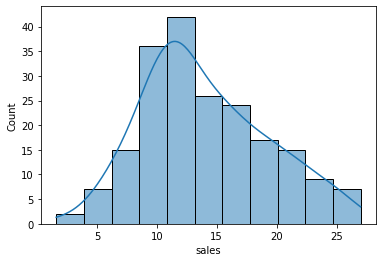

In [61]:
sns.histplot(data=df, x="sales", kde=True)

the sales value(target) are high in range 10 to 18 and it is almost meeting normal distribution

<AxesSubplot:xlabel='newspaper', ylabel='Count'>

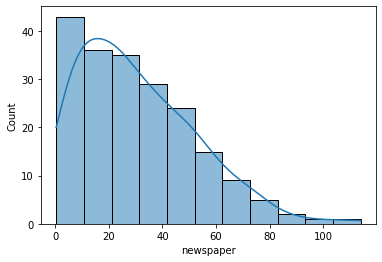

In [62]:
sns.histplot(data=df, x="newspaper", kde=True)

the newspaper sales value is high in range 1  to 40.it is right skewed.becoz not not having sales more than 40 much

<AxesSubplot:xlabel='radio', ylabel='Count'>

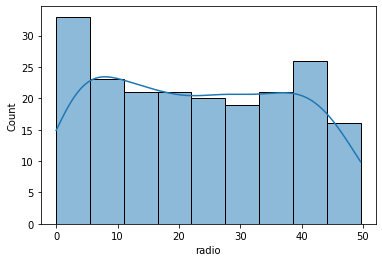

In [63]:
sns.histplot(data=df, x="radio", kde=True)

sales through radio are always equal in range scale.

<AxesSubplot:xlabel='TV', ylabel='Count'>

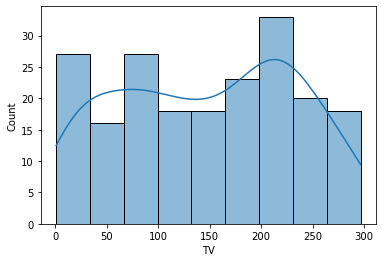

In [64]:
sns.histplot(data=df, x="TV", kde=True)

sales through TV also almost being  equal in range only.

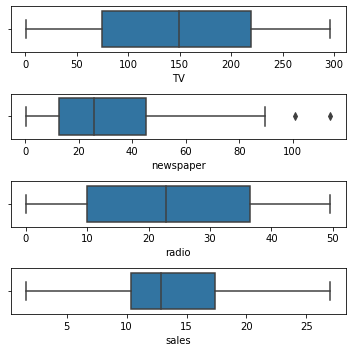

In [65]:
fig, axs = plt.subplots(4, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['radio'], ax = axs[2])
plt4 = sns.boxplot(df['sales'], ax = axs[3])
plt.tight_layout()


here TV has high sales value around 150
newspaper has high sales value around 30
radio has high sales value around 25
so total sales through all these are high in value around 12

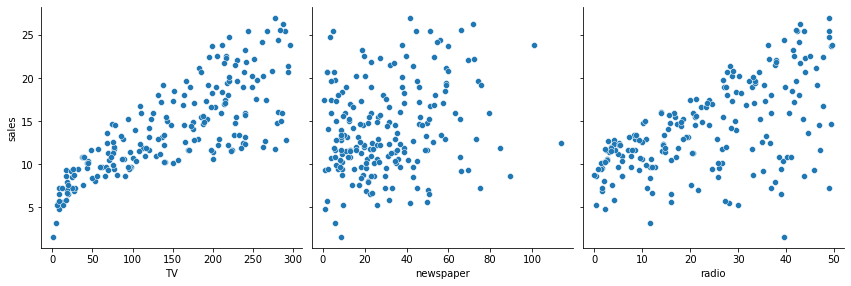

In [66]:
# Let's see how Sales are related with other variables using scatter plot.
sns.pairplot(df, x_vars=['TV', 'newspaper', 'radio'], y_vars='sales', height=4, aspect=1, kind='scatter')
plt.show()

if TV and Radio sale value increases then Target sale value also increases.
newspaper sale value has not has much impact on the sale value of the target column

In [67]:
#index column not needed so drop
df=df.drop(['Unnamed: 0'],axis=1) 
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [68]:
#sum of total TV sale values
total_tv_sale=df['TV'].sum()
total_tv_sale

29408.5

In [69]:
#sum of total Radio sale values
total_radio_sale=df['radio'].sum()
total_radio_sale

4652.800000000001

In [70]:
#sum of total newspaper sale values
total_newspaper_sale=df['newspaper'].sum()
total_newspaper_sale

6110.799999999999

In [71]:
##sum of total sales through TV,RADIO and NEWSpaper values
total_sales=df['sales'].sum()
total_sales

2804.5

we can see that Sales happened through TV is HIGH among all and it contributes also more to the increase of total sale value

In [72]:
#find correlation co.efficient of all variables in table
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


TV is most highly positively correlated with the target sales.so it contributes high to the target.it means if its sales value increases target sales value also increases

<AxesSubplot:>

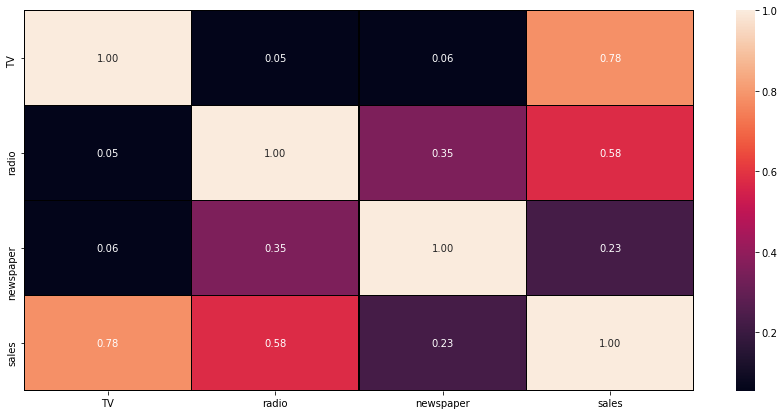

In [73]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor="black",fmt='.2f')

all columns are positively correlated with target.there is no zero correlation or negative correlation here

In [74]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


newspaper column is right skewed

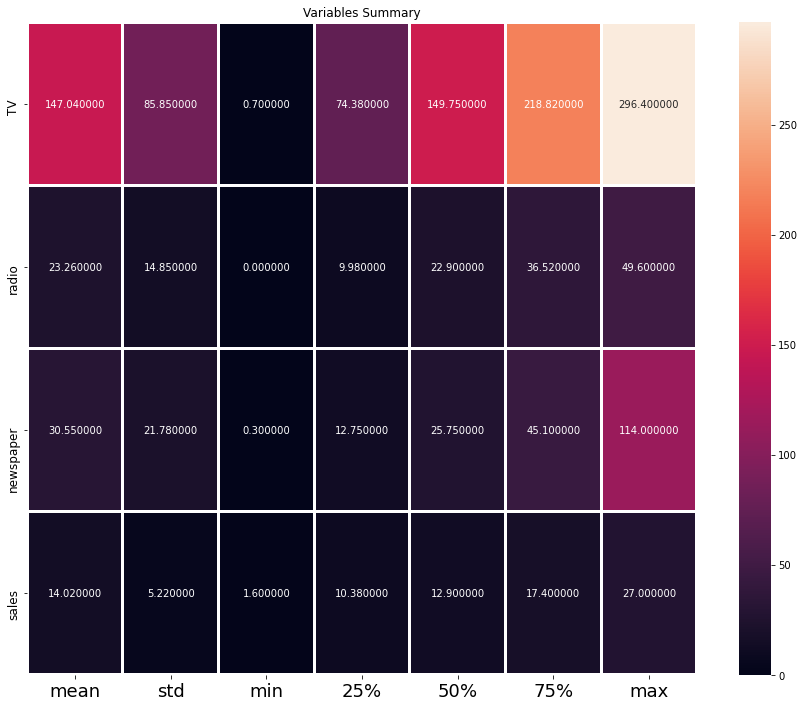

In [75]:
plt.figure(figsize=(15,12))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Variables Summary")
plt.show()

newspaper is right skewed there could be outliers present in it

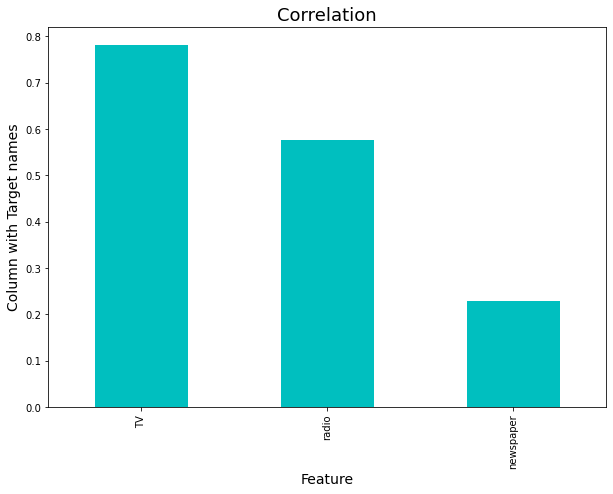

In [76]:
plt.figure(figsize=(10,7))
df.corr()['sales'].sort_values(ascending=False).drop(['sales']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Column with Target names',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

All are positively correlated columns

In [77]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [78]:
df.shape


(200, 4)

In [79]:
df.shape[1]


4

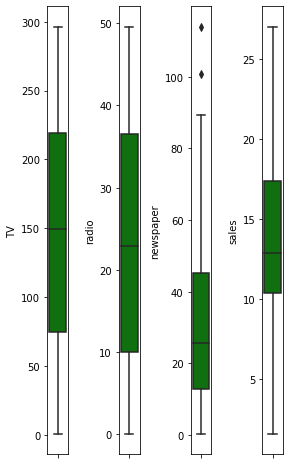

In [80]:
collist=df.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(y=df[collist[i]],color='green',orient='v')
    plt.tight_layout()

In [81]:
#ckeck skewness
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

newspaper has skewness value >0.5 and its very high.so it is right skewed due to outliers

#checking Z-score to remove outliers

In [82]:

import numpy as np
from scipy.stats import zscore
z=np.abs(zscore(df))
z.shape


(200, 4)

In [83]:
threshold=3
print(np.where(z>3))

(array([ 16, 101], dtype=int64), array([2, 2], dtype=int64))


In [84]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(200, 4)
(198, 4)


some outliers got removed

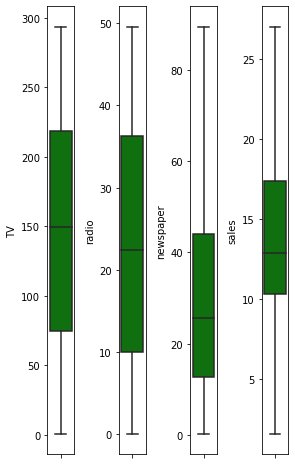

In [85]:
#checking outliers
collist=df_new.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(y=df_new[collist[i]],color='green',orient='v')
    plt.tight_layout()

In [86]:
#finds data loss
loss_percent=(200-198)/(200*100)
print(loss_percent)

0.0001


data loss percentage is very low.data is cleaned also

In [87]:
df_new

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [88]:
df_new.shape

(198, 4)

In [89]:
#seggregate input data and output data
x=df_new.iloc[:,:-1]
y=df_new.iloc[:,-1]

In [90]:
#removing skewness using power transform
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[ 0.95598306,  0.9691098 ,  1.6041965 ],
       [-1.19200349,  1.04623436,  0.83104401],
       [-1.6461253 ,  1.37296802,  1.60705249],
       [ 0.14293428,  1.1473316 ,  1.28376774],
       [ 0.45645241, -0.73502642,  1.28062154],
       [-1.8204008 ,  1.51543955,  1.76610727],
       [-1.00349358,  0.70309642, -0.10205346],
       [-0.20996049, -0.0876566 , -0.84968895],
       [-1.82264543, -1.62948287, -2.09866461],
       [ 0.652694  , -1.56152179, -0.22649933],
       [-0.88482761, -1.19258569, -0.06553382],
       [ 0.80322028,  0.19357553, -1.59608414],
       [-1.52567125,  0.82725998,  1.50859232],
       [-0.48090308, -1.01613619, -1.23269654],
       [ 0.69642374,  0.70856268,  0.86367455],
       [ 0.60769456,  1.45886692,  1.1026083 ],
       [ 1.44702338,  1.06152278,  1.19771741],
       [-0.84304109, -0.02834315, -0.39458775],
       [ 0.09676151,  0.18741189, -0.346834  ],
       [ 0.84017479,  0.41523303,  1.11921444],
       [ 1.02746612, -1.2660875 , -0.102

In [91]:
#scaling to get better model performance
from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler()
x = mmscaler.fit_transform(x)
x

array([[0.83184229, 0.83610008, 0.87878833],
       [0.23409837, 0.85792891, 0.70367754],
       [0.10772489, 0.95040548, 0.87943518],
       [0.60558624, 0.88654282, 0.80621464],
       [0.69283238, 0.3537725 , 0.80550206],
       [0.05922732, 0.99072969, 0.91545939],
       [0.28655711, 0.76080939, 0.49234092],
       [0.50738231, 0.53699982, 0.32300945],
       [0.05860268, 0.10061138, 0.04012979],
       [0.7474427 , 0.11984664, 0.46415525],
       [0.31957959, 0.22426791, 0.50061222],
       [0.78933131, 0.61659793, 0.1539589 ],
       [0.14124496, 0.79595184, 0.85713501],
       [0.43198413, 0.27420902, 0.23626232],
       [0.75961185, 0.76235653, 0.71106801],
       [0.73492021, 0.97471774, 0.76518395],
       [0.9684895 , 0.86225605, 0.78672515],
       [0.33120799, 0.55378751, 0.42608502],
       [0.59273723, 0.61485341, 0.43690074],
       [0.79961504, 0.67933442, 0.76894507],
       [0.85173467, 0.20346443, 0.49234092],
       [0.08586885, 0.4647064 , 0.73983741],
       [0.

Linear Regression

In [92]:
#Linear Regression
#model fitting
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split



In [93]:
#getting best accuracy with help of selecting random state
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"At random state {i},the training accuracy is:{r2_score(y_train,pred_train)*100}")
    print(f"At random state {i},the testing accuracy is:{r2_score(y_test,pred_test)*100}")
    print("\n")
    
    
    
    

At random state 0,the training accuracy is:90.1291002097885
At random state 0,the testing accuracy is:91.53223525494353


At random state 1,the training accuracy is:90.75607053875349
At random state 1,the testing accuracy is:88.99875371730131


At random state 2,the training accuracy is:91.45487608535885
At random state 2,the testing accuracy is:86.90670885581866


At random state 3,the training accuracy is:90.38683476410915
At random state 3,the testing accuracy is:90.94654993350765


At random state 4,the training accuracy is:90.80156627542777
At random state 4,the testing accuracy is:88.05025579845189


At random state 5,the training accuracy is:90.44410731238212
At random state 5,the testing accuracy is:89.45026194148484


At random state 6,the training accuracy is:90.71648377019737
At random state 6,the testing accuracy is:89.2165738022297


At random state 7,the training accuracy is:90.34105955818168
At random state 7,the testing accuracy is:90.83214353182576


At random state 8,

In [94]:
#evaluation metrics

print("Accuracy:", r2_score(y_test,pred_test)*100)

Accuracy: 93.12602169950902


In [95]:
#cross validation at random state
Train_accuracy=(r2_score(y_train,pred_train)*100)
Test_accuracy=r2_score(y_test,pred_test)*100
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()*100
    print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for Training is {Train_accuracy} and accuracy score for Testing is {Test_accuracy}")
    print("\n")
    

At cross fold 2 the cv score is 90.17064197605747 and accuracy score for Training is 89.53616294800109 and accuracy score for Testing is 93.12602169950902


At cross fold 3 the cv score is 89.73645562112824 and accuracy score for Training is 89.53616294800109 and accuracy score for Testing is 93.12602169950902


At cross fold 4 the cv score is 89.86654359289577 and accuracy score for Training is 89.53616294800109 and accuracy score for Testing is 93.12602169950902


At cross fold 5 the cv score is 89.58270968555071 and accuracy score for Training is 89.53616294800109 and accuracy score for Testing is 93.12602169950902


At cross fold 6 the cv score is 89.87009469201537 and accuracy score for Training is 89.53616294800109 and accuracy score for Testing is 93.12602169950902


At cross fold 7 the cv score is 89.49442949991982 and accuracy score for Training is 89.53616294800109 and accuracy score for Testing is 93.12602169950902


At cross fold 8 the cv score is 89.80187277211998 and accu

parameter tuning

In [96]:
#perform gridsearchcv and cross val score on LinearRegression
from sklearn.model_selection import GridSearchCV

parameters={ 'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True,False], 'n_jobs':[None,1,-1], 'positive':[True,False]}
lr=LinearRegression()
clf=GridSearchCV(lr,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

                                  

{'copy_X': True, 'fit_intercept': False, 'n_jobs': None, 'normalize': True, 'positive': True}


In [97]:
lr=LinearRegression(copy_X= True, fit_intercept= False, n_jobs= None, normalize= True, positive= True)
lr.fit(x_train,y_train)
pred_test_lr=lr.predict(x_test)
pred_train_lr=lr.predict(x_train)
lr_score = lr.score(x_train,y_train)
lr_acc_score=r2_score(y_test,pred_test)
print("Accuracy score is:",lr_acc_score*100)
print("score of model is:",lr_score*100)

Accuracy score is: 93.12602169950902
score of model is: 89.4225286904374


In [98]:
cv_score_lr=cross_val_score(lr,x,y,cv=5)
cv_mean_lr=cv_score_lr.mean()
print("cv_mean is:",cv_mean_lr*100)

cv_mean is: 89.80502040902705


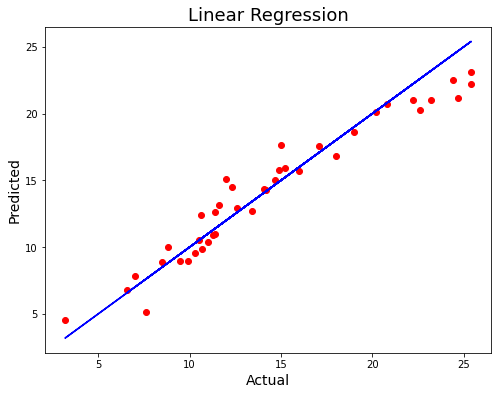

In [99]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

In [100]:
#evaluation metrics
print("mean absolute error",mean_absolute_error(y_test,pred_test))
print("mean squared error",mean_squared_error(y_test,pred_test))
print("Root mean squared error",np.sqrt(mean_squared_error(y_test,pred_test)))
print("r2_score is",r2_score(y_test,pred_test)*100)

mean absolute error 1.1479692616985457
mean squared error 2.2218205846176518
Root mean squared error 1.4905772655644698
r2_score is 93.12602169950902


lasso regression

In [102]:
#perform gridsearchcv and cross val score on lasso regression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import Lasso
parameters={'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0,10)),'fit_intercept':[True,False],'normalize':[True,False],'tol':[0.001]}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)


{'alpha': 0.01, 'fit_intercept': False, 'normalize': True, 'random_state': 0, 'tol': 0.001}


In [103]:
ls=Lasso(alpha=0.01,random_state=0,fit_intercept= True, normalize= True,tol= 0.001)
ls.fit(x_train,y_train)
pred_test_ls=ls.predict(x_test)
pred_train_ls=ls.predict(x_train)
ls_score = ls.score(x_train,y_train)
ls_acc_score=r2_score(y_test,pred_test_ls)
print("Accuracy score is:",ls_acc_score*100)


Accuracy score is: 92.34737994017821


In [104]:
#checks cv score
for u in range(2,10):
    cv_score_ls=cross_val_score(ls,x,y,cv=5)
    cv_mean_ls=cv_score_ls.mean()
    print("At cv :-",j )
    print("cv_score is:",cv_mean_ls*100)
    print("accuracy score---r2_score is",ls_acc_score*100)

At cv :- 9
cv_score is: 89.55772453716186
accuracy score---r2_score is 92.34737994017821
At cv :- 9
cv_score is: 89.55772453716186
accuracy score---r2_score is 92.34737994017821
At cv :- 9
cv_score is: 89.55772453716186
accuracy score---r2_score is 92.34737994017821
At cv :- 9
cv_score is: 89.55772453716186
accuracy score---r2_score is 92.34737994017821
At cv :- 9
cv_score is: 89.55772453716186
accuracy score---r2_score is 92.34737994017821
At cv :- 9
cv_score is: 89.55772453716186
accuracy score---r2_score is 92.34737994017821
At cv :- 9
cv_score is: 89.55772453716186
accuracy score---r2_score is 92.34737994017821
At cv :- 9
cv_score is: 89.55772453716186
accuracy score---r2_score is 92.34737994017821


In [105]:
#evaluation metrics
print("mean absolute error",mean_absolute_error(y_test,pred_test_ls))
print("mean squared error",mean_squared_error(y_test,pred_test_ls))
print("Root mean squared error",np.sqrt(mean_squared_error(y_test,pred_test_ls)))
print("r2_score is",r2_score(y_test,pred_test_ls)*100)

mean absolute error 1.209071748628825
mean squared error 2.47349468268696
Root mean squared error 1.5727347782404253
r2_score is 92.34737994017821


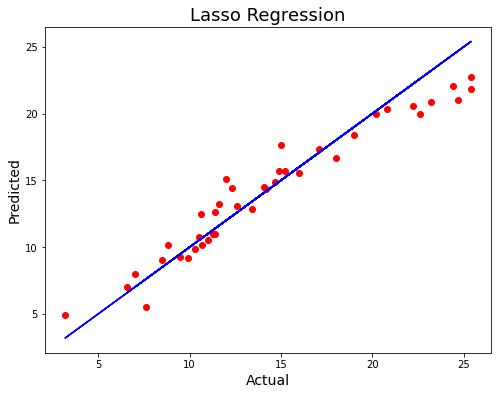

In [106]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test_ls,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Lasso Regression',fontsize=18)
plt.show()

thus the Lasso regression performs well here.all data points are near to best fit line

RandomForestRegressor

In [107]:
#perform gridsearchcv and cross val score on RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
parameters={'criterion':['friedman_mse','mae'],'max_features':["auto","sqrt","log2"],'n_estimators':[50,100],'random_state':list(range(0,7)),'bootstrap': [True, False]}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

                                                      


{'bootstrap': True, 'criterion': 'mae', 'max_features': 'auto', 'n_estimators': 100, 'random_state': 1}


In [108]:
rf=RandomForestRegressor(criterion="mae",max_features="auto",n_estimators=100,random_state=1,bootstrap=True)
rf.fit(x_train,y_train)
pred_test_rf=rf.predict(x_test)
pred_train_rf=rf.predict(x_train)
rf_score = rf.score(x_train,y_train)
rf_acc_score=r2_score(y_test,pred_test)
print("Accuracy score is:",rf_acc_score*100)
print("score of model is:",rf_score*100)

Accuracy score is: 93.12602169950902
score of model is: 99.61673991513305


In [109]:
cv_score_rf=cross_val_score(rf,x,y,cv=5)
cv_mean_rf=cv_score_rf.mean()
print("cv_mean is:",cv_mean_rf*100)

cv_mean is: 97.70826362590995


In [110]:
#evaluation metrics
print("mean absolute error",mean_absolute_error(y_test,pred_test_rf))
print("mean squared error",mean_squared_error(y_test,pred_test_rf))
print("Root mean squared error",np.sqrt(mean_squared_error(y_test,pred_test_rf)))
print("r2_score is",r2_score(y_test,pred_test_rf)*100)

mean absolute error 0.6587749999999977
mean squared error 0.646491324999998
Root mean squared error 0.8040468425409044
r2_score is 97.99985319684559


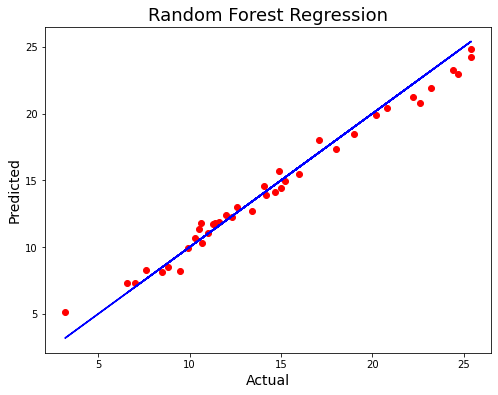

In [113]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test_rf,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Random Forest Regression',fontsize=18)
plt.show()

Ridge Regressor

In [114]:
#perform gridsearchcv and cross val score on Ridge Regressor
from sklearn.linear_model import Ridge
parameters={'alpha':[0.0001,0.001,0.01,0.1,1],'fit_intercept':[True,False],'normalize':[True,False],'tol':[0.001],'random_state':list(range(0,10))}
rd=Ridge()
clf=GridSearchCV(rd,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)


{'alpha': 0.1, 'fit_intercept': False, 'normalize': True, 'random_state': 0, 'tol': 0.001}


In [115]:
rd=Ridge(alpha=0.1,fit_intercept=False,normalize=True,random_state=0,tol=0.001)
rd.fit(x_train,y_train)
pred_test_rd=rd.predict(x_test)
pred_train_rd=rd.predict(x_train)
rd_score = rd.score(x_train,y_train)
rd_acc_score=r2_score(y_test,pred_test_rd)
print("Accuracy score is:",rd_acc_score*100)
print("score of model is:",rd_score*100)

Accuracy score is: 93.3631429008751
score of model is: 89.41990429061593


In [116]:
cv_score_rd=cross_val_score(rd,x,y,cv=5)
cv_mean_rd=cv_score_rd.mean()
print("cv_mean is:",cv_mean_rd*100)

cv_mean is: 89.8158863099927


In [117]:
#evaluation metrics
print("mean absolute error",mean_absolute_error(y_test,pred_test_rd))
print("mean squared error",mean_squared_error(y_test,pred_test_rd))
print("Root mean squared error",np.sqrt(mean_squared_error(y_test,pred_test_rd)))
print("r2_score is",r2_score(y_test,pred_test_rd)*100)

mean absolute error 1.1307554015393961
mean squared error 2.145177810489776
Root mean squared error 1.464642553830038
r2_score is 93.3631429008751


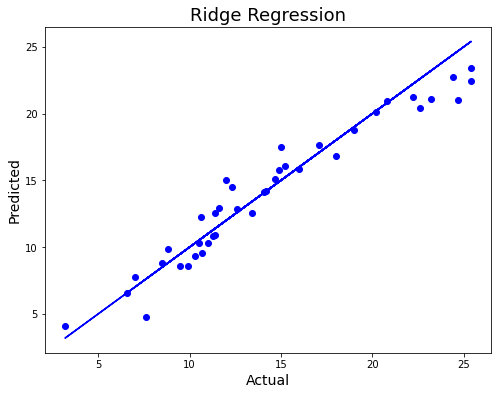

In [118]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test_rd,color='b')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Ridge Regression',fontsize=18)
plt.show()

thus the Ridge regression performs well here.all data points are near to best fit line

Decison Tree Regressor

In [119]:
#perform gridsearchcv and cross val score on Decison Tree Regressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
parameters={'criterion':['mse','friedman_mse','mae','poisson'],'splitter':['best','random'],'max_features':['auto', 'sqrt', 'log2'],'random_state':list(range(0,10)),'min_weight_fraction_leaf':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}
dt=DecisionTreeRegressor()
clf=GridSearchCV(dt,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

                  

{'criterion': 'mae', 'max_features': 'auto', 'min_weight_fraction_leaf': 0.1, 'random_state': 0, 'splitter': 'best'}


In [120]:
dt=DecisionTreeRegressor(criterion='mae',splitter='best',max_features='auto', min_weight_fraction_leaf= 0.1, random_state= 0)
dt.fit(x_train,y_train)
pred_test_dt=dt.predict(x_test)
pred_train_dt=dt.predict(x_train)
dt_score = dt.score(x_train,y_train)
dt_acc_score=r2_score(y_test,pred_test)
print("Accuracy score is:",dt_acc_score*100)
print("score of model is:",dt_score*100)


Accuracy score is: 93.12602169950902
score of model is: 88.99551627135541


In [121]:
cv_score_dt=cross_val_score(dt,x,y,cv=5)
cv_mean_dt=cv_score_dt.mean()
print("cv_mean is:",cv_mean_dt*100)

cv_mean is: 84.04861039443628


In [122]:
#evaluation metrics
print("mean absolute error",mean_absolute_error(y_test,pred_test_dt))
print("mean squared error",mean_squared_error(y_test,pred_test_dt))
print("Root mean squared error",np.sqrt(mean_squared_error(y_test,pred_test_dt)))
print("r2_score is",r2_score(y_test,pred_test_dt)*100)

mean absolute error 1.66875
mean squared error 4.327062499999998
Root mean squared error 2.0801592487115013
r2_score is 86.6127202458218


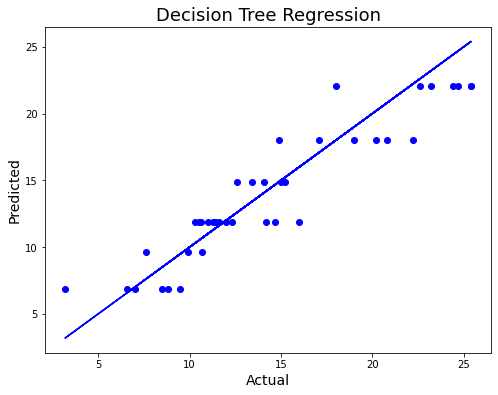

In [123]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test_dt,color='b')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Decision Tree Regression',fontsize=18)
plt.show()

thus the Decision Tree regression performs well here.all data points are near to best fit line

GradientBoostingRegressor

In [124]:
#perform gridsearchcv and cross val score on  GradientBoostingRegressor
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
parameters={'loss':['ls','lad','huber','quantile'],'n_estimators':[50,100],'criterion':['friedman_mse','mse'], 'learning_rate':[0.05],'max_depth' : [9,10,11],'min_weight_fraction_leaf':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}
gbr=GradientBoostingRegressor()
clf=GridSearchCV(gbr,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)



{'criterion': 'friedman_mse', 'learning_rate': 0.05, 'loss': 'ls', 'max_depth': 9, 'min_weight_fraction_leaf': 0.1, 'n_estimators': 100}


In [125]:
gbr=GradientBoostingRegressor(criterion='friedman_mse',loss='ls',n_estimators= 100, learning_rate=0.05,max_depth=11, min_weight_fraction_leaf= 0.1)
gbr.fit(x_train,y_train)
pred_test_gbr=gbr.predict(x_test)
pred_train_gbr=gbr.predict(x_train)
gbr_score = gbr.score(x_train,y_train)
gbr_acc_score=r2_score(y_test,pred_test)
print("Accuracy score is:",gbr_acc_score*100)
print("score of model is:",gbr_score*100)

Accuracy score is: 93.12602169950902
score of model is: 98.2868165441404


In [126]:
cv_score_gbr=cross_val_score(gbr,x,y,cv=5)
cv_mean_gbr=cv_score_gbr.mean()
print("cv_mean is:",cv_mean_gbr*100)

cv_mean is: 96.69848752200787


In [127]:
#evaluation metrics
print("mean absolute error",mean_absolute_error(y_test,pred_test_gbr))
print("mean squared error",mean_squared_error(y_test,pred_test_gbr))
print("Root mean squared error",np.sqrt(mean_squared_error(y_test,pred_test_gbr)))
print("r2_score is",r2_score(y_test,pred_test_gbr)*100)

mean absolute error 0.6657749807301376
mean squared error 0.8845802394090583
Root mean squared error 0.9405212594136606
r2_score is 97.26324194994017


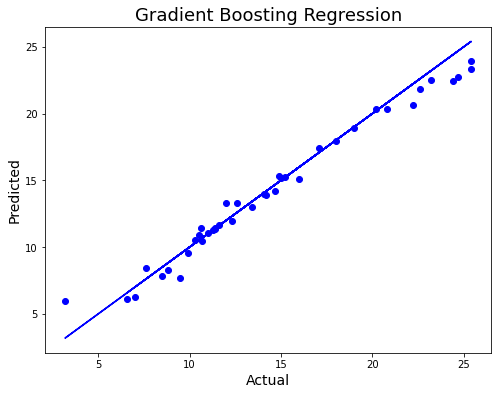

In [128]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test_gbr,color='b')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Gradient Boosting Regression',fontsize=18)
plt.show()

Support Vector Regressor

In [129]:
#perform gridsearchcv and cross val score on Support Vector Regressor
from sklearn.svm import SVR
parameters ={'kernel':['linear','poly','rbf','sigmoid'],'gamma':['scale', 'auto'],'tol':[0.01,0.0001,0.001],'shrinking':[True,False],'degree':[3,4,5],'max_iter':[1,2,-1]}
sv=SVR()
clf=GridSearchCV(sv,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)


{'degree': 3, 'gamma': 'scale', 'kernel': 'poly', 'max_iter': -1, 'shrinking': False, 'tol': 0.001}


In [130]:
sv=SVR(kernel='poly',gamma='scale',degree= 3,max_iter= -1, shrinking= False, tol= 0.001)
sv.fit(x_train,y_train)
pred_test_sv=sv.predict(x_test)
pred_train_sv=sv.predict(x_train)
sv_score = sv.score(x_train,y_train)
sv_acc_score=r2_score(y_test,pred_test)
print("Accuracy score is:",sv_acc_score*100)
print("score of model is:",sv_score*100)

Accuracy score is: 93.12602169950902
score of model is: 94.8784102503791


In [131]:
cv_score_sv=cross_val_score(sv,x,y,cv=5)
cv_mean_sv=cv_score_sv.mean()
print("cv_mean is:",cv_mean_sv*100)

cv_mean is: 93.77666573780665


In [132]:
#evaluation metrics
print("mean absolute error",mean_absolute_error(y_test,pred_test_sv))
print("mean squared error",mean_squared_error(y_test,pred_test_sv))
print("Root mean squared error",np.sqrt(mean_squared_error(y_test,pred_test_sv)))
print("r2_score is",r2_score(y_test,pred_test_sv)*100)

mean absolute error 0.8388496710874744
mean squared error 1.9037601327348437
Root mean squared error 1.3797681445572092
r2_score is 94.11005284028766


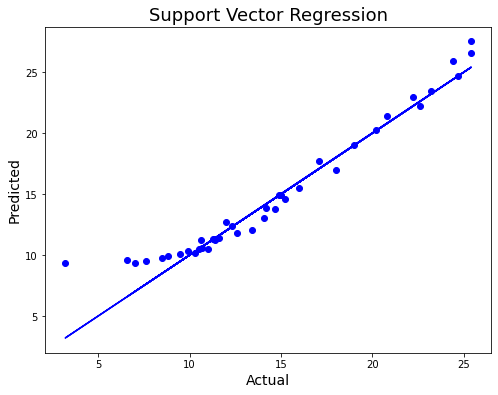

In [133]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test_sv,color='b')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Support Vector Regression',fontsize=18)
plt.show()

thus the Support Vector Regression performs well here.all data points are near to best fit line

#Elastic Net Regression(combination of L1 & L2)

In [134]:
from sklearn.linear_model import ElasticNet
parameters={'alpha':[0.0001,0.001,0.01,0.1,1],'fit_intercept':[True,False],'normalize':[True,False],'tol':[0.001],'random_state':list(range(0,10))}
enr=ElasticNet()
clf=GridSearchCV(enr,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.01, 'fit_intercept': False, 'normalize': True, 'random_state': 0, 'tol': 0.001}


In [135]:
enr=ElasticNet(alpha=0.01,fit_intercept= False, normalize= True, random_state= 0, tol= 0.001)
enr.fit(x_train,y_train)
pred_test_enr=enr.predict(x_test)
pred_train_enr=enr.predict(x_train)
enr_score = enr.score(x_train,y_train)
enr_acc_score=r2_score(y_test,pred_test)
print("Accuracy score is:",enr_acc_score*100)
print("score of model is:",enr_score*100)

Accuracy score is: 93.12602169950902
score of model is: 89.27158756205749


In [136]:
cv_score_enr=cross_val_score(enr,x,y,cv=5)
cv_mean_enr=cv_score_enr.mean()
print("cv_mean is:",cv_mean_enr*100)

cv_mean is: 89.74519108542424


In [137]:
#evaluation metrics
print("mean absolute error",mean_absolute_error(y_test,pred_test_enr))
print("mean squared error",mean_squared_error(y_test,pred_test_enr))
print("Root mean squared error",np.sqrt(mean_squared_error(y_test,pred_test_enr)))
print("r2_score is",r2_score(y_test,pred_test_enr)*100)

mean absolute error 1.1848118641847531
mean squared error 2.302725035516139
Root mean squared error 1.5174732404613067
r2_score is 92.87571551198891


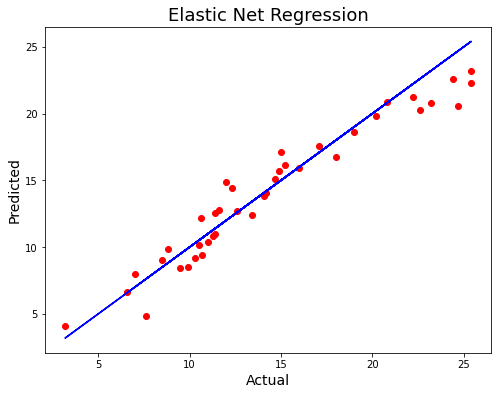

In [140]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test_enr,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Elastic Net Regression',fontsize=18)
plt.show()

conclusion

Output

In [148]:
import numpy as np
a=np.array(y_test)
predicted=np.array(rd.predict(x_test))
df_con=pd.DataFrame({"Original":a,"Predicted":predicted},index=range(len(a)))
df_con


,Original,Predicted
0,11.6,12.946376
1,6.6,6.551916
2,11.0,10.312724
3,9.5,8.557694
4,9.9,8.615453
5,11.4,12.574907
6,10.5,10.275069
7,13.4,12.534207
8,22.2,21.269505
9,20.8,20.944260


In [153]:
import pickle
filename='happy.pkl'
pickle.dump(rd,open(filename,'wb'))


In [154]:
models=['Linear Regression','Lasso regression','RandomForestRegressor','Ridge Regressor','Decison Tree Regressor','GradientBoostingRegressor'
,'Support Vector Regressor','ElasticNetRegressor']
        


In [155]:
scores=[ r2_score(y_test,pred_test)*100,ls_acc_score*100,rf_acc_score*100,rd_acc_score*100,dt_acc_score*100,gbr_acc_score*100,sv_acc_score*100,enr_acc_score*100]
scores

[93.12602169950902,
 92.34737994017821,
 93.12602169950902,
 93.3631429008751,
 93.12602169950902,
 93.12602169950902,
 93.12602169950902,
 93.12602169950902]

In [156]:
Nos=[]
for i in range(1,len(models)+1):
    Nos.append(i)
Nos    

[1, 2, 3, 4, 5, 6, 7, 8]

In [157]:
import pandas as pd
Model_scores=pd.DataFrame({})
Model_scores['Nos']=Nos
Model_scores['Model Names']=models
Model_scores['Scores']=scores
Model_scores.style.hide_index()


Nos,Model Names,Scores
1,Linear Regression,93.126022
2,Lasso regression,92.347380
3,RandomForestRegressor,93.126022
4,Ridge Regressor,93.363143
5,Decison Tree Regressor,93.126022
6,GradientBoostingRegressor,93.126022
7,Support Vector Regressor,93.126022
8,ElasticNetRegressor,93.126022


From the above models,Ridge Regression performs the best.so it it the best model.so we saved that model

we can conclude that Marketing through TV increases the total sales and for itself too 